In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torchdiffeq import odeint_adjoint as odeint
from scipy.integrate import solve_ivp

In [2]:
t = torch.linspace(0.0, 30.0, 1000)
ts = (0,30)
g = 9.8
L1 = 1 
L2 = 1
m1 = 10
m2 = 10

In [3]:
#SOLVE WITH ODEINT AND TORCH

In [4]:
class func(nn.Module):
    def forward(self,t,u):
        y = u[0]
        c, s = np.cos(y[0]-y[2]), np.sin(y[0]-y[2])
    
        de = torch.zeros_like(y)
        de[0] = y[1] #x1' = x2
        de[1] = (m2*g*np.sin(y[2])*c - m2*s*(L1*y[1]**2*c + L2*y[3]**2) - (m1 + m2)*g*np.sin(y[0]))/L1/(m1 + m2*s**2)
        de[2] = y[3] #y1' = y2
        de[3] = ((m1+m2)*(L1*y[1]**2*s - g*np.sin(y[2]) + g*np.sin(y[0])*c) + m2*L2*y[3]**2*s*c)/L2/(m1 + m2*s**2)

        return de

In [5]:
#SOLVE WITH SOLVE_IVP AND NUMPY

In [6]:
def slope(t,y):
    c, s = np.cos(y[0]-y[2]), np.sin(y[0]-y[2])
    
    de = np.zeros_like(y)
    de[0] = y[1] #x1' = x2
    de[1] = (m2*g*np.sin(y[2])*c - m2*s*(L1*y[1]**2*c + L2*y[3]**2) - (m1 + m2)*g*np.sin(y[0]))/L1/(m1 + m2*s**2)
    de[2] = y[3] #y1' = y2
    de[3] = ((m1+m2)*(L1*y[1]**2*s - g*np.sin(y[2]) + g*np.sin(y[0])*c) + m2*L2*y[3]**2*s*c)/L2/(m1 + m2*s**2)
 
    return de

In [7]:
#FUNCTIONS GENERAL

In [8]:
def random():
    rand = 0
    while abs(rand) < 0.5 or abs(rand) > 3:
        rand = np.random.normal(0, 1, 1)[0]
    return rand

In [9]:
#FUNCTIONS NUMPY

In [10]:
def getSlopes(x):
    dim =  x.shape[0]**4
    slopeList = np.zeros((dim,4))
    i = 0
    for f in x:
        for g in x:
            for h in x:
                for m in x:
                    #print(slope([],[f,g,h,m]))
                    slopeList[i] = slope([],[f,g,h,m])
                    i += 1
    return slopeList

In [14]:
#FUNCTIONS TORCH

In [89]:
def getSlopesTorch(x):
    dim =  x.shape[0]**4
    slopeList = torch.zeros((dim,4))
    i = 0
    for f in x:
        for g in x:
            for h in x:
                for m in x:
                    #print(slope([],[f,g,h,m]))
                    slopeList[i] = func().forward([],torch.tensor([[f,g,h,m]]))
                    i += 1
    return slopeList

In [17]:
#GRAPHING

In [90]:
X = torch.linspace(-2.0,2.0,10) #for calculating slopes

In [84]:
sl = getSlopes(X.numpy())

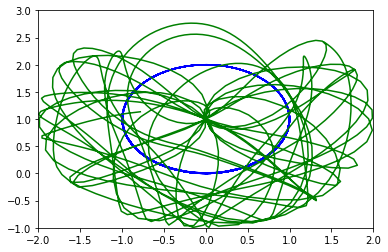

In [97]:
#for i in range(0,5):
    #y0 = [random(),random()]
y0 = [3*np.pi/4, 0, 3*np.pi/4, 0] 
sol45 = solve_ivp(slope, ts, y0, t_eval=t, method='RK45')
#print(sol45.y[0,0],sol45.y[1,0])

theta1 = sol45.y[0]
theta2 = sol45.y[2]
x1_cor = 0
y1_cor = 1

x1 = L1 * np.sin(theta1) + x1_cor
y1 = -L1 * np.cos(theta1) + y1_cor
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

plt.plot(x1,y1,'b',x2,y2,'g')
    
plt.xlim(-2,2)
plt.ylim(-1,3)
plt.show()

In [92]:
slT = getSlopesTorch(X.numpy())
print (torch.numel(slT))
print (slT.size())

40000
torch.Size([10000, 4])


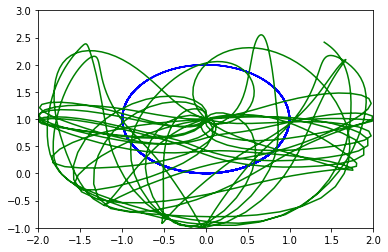

In [98]:
#for i in range(0,5):
    #y0 = torch.tensor([[random(),random()]])
y0 = torch.tensor([[3*np.pi/4, 0, 3*np.pi/4, 0]])
solution = odeint(func(), y0, t, method='adams')

theta1 = solution.numpy()[:,0,0]
theta2 = solution.numpy()[:,0,2]
x1_cor = 0
y1_cor = 1

x1 = L1 * np.sin(theta1) + x1_cor
y1 = -L1 * np.cos(theta1) + y1_cor
x2 = x1 + L2 * np.sin(theta2)
y2 = y1 - L2 * np.cos(theta2)

plt.plot(x1,y1,'b',x2,y2,'g')
    
plt.xlim(-2,2)
plt.ylim(-1,3)
plt.show()